# Sistemas de 2° Orden

#### Index
1. <a href="#introduccion">Introducción</a>
2. <a href="#2.-Sistemas-sobre-amortiguados">Sistemas sobre amortiguados</a>
    1. <a href="#respuesta-al-escalon-unitario">Respuesta al escalón unitario</a>
3. <a href="#sist-amortiguacion-critica">Sistemas con amortiguación crítica</a>
4. <a href="#sist-subamortiguado">Sistemas subamortiguados</a>
5. <a href="#5.-Ejercicios">Ejercicios</a>
    - <a href="#Ejercicio-1">Ejercicio 1</a>

In [2]:
import lcapy as lp # libreria para análisis de circuitos
import numpy as np
import matplotlib.pyplot as plt
import control.matlab as ml
import control as ctrl

__Nota__: utilizaremos la librería `lcapy` para realizar los diagramas en bloque. Más información en su documentación: <a href="https://lcapy.readthedocs.io/en/latest/schematics.html#block-diagrams">Block diagrams</a>

## 1. <span id="introduccion">Introducción</span>

La expresión general es:

$$G(s) = \frac{C(s)}{R(s)} = K \cdot \frac{\omega_n ^2}{s^2 + 2 \xi \omega_n s + \omega_n ^2}$$

donde $\xi$ es el factor de _amortiguamiento relativo_ y $\omega_n$ es la _frecuencia natural_ del sistema.

La ecuación característica son los polos del denominador:
$$s_{1,2} = -\xi \omega_n ± \omega_n \sqrt{\xi ^2 - 1}$$

El sistema queda:

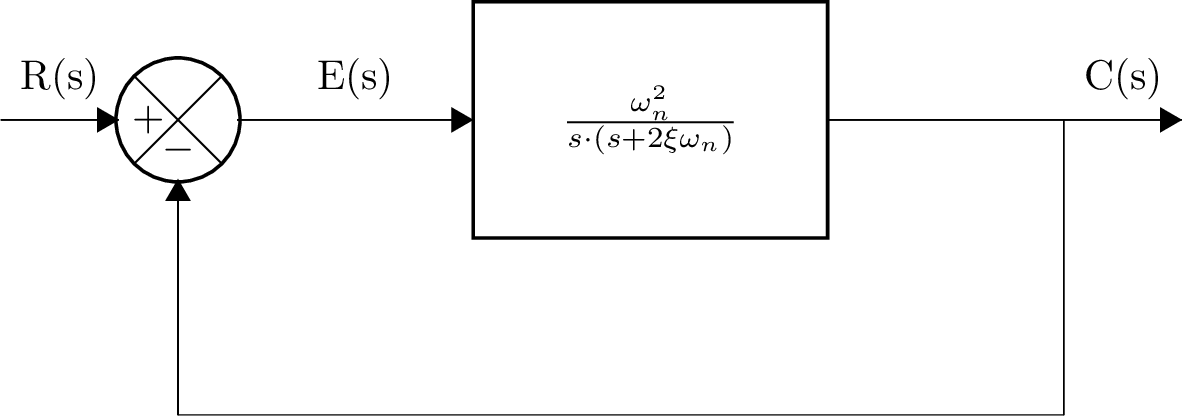

In [19]:
cct = lp.Circuit()
cct.add("""
    W 1 2; right=0.5, endarrow=tri, l=R(s)
    SP1 pm 2 10 3; right, l={}
    W 3 4; endarrow=tri, l=E(s)
    TR1 4 5; right=1.5, l=${\\frac{\\omega_n ^2}{s \\cdot (s + 2 \\xi \\omega_n)}}$
    W 5 6; right, l={}
    W 6 8; down
    W 8 9; left
    W 9 10; up, endarrow=tri
    W 6 7; right=0.5, endarrow=tri, l=C(s)
    ; draw_nodes=false, label_nodes=false
""")
cct.draw()

## 2. Sistemas sobre amortiguados

Se cumple para estos sistemas que $\xi > 1 \Rightarrow$ se tienen raíces _reales_ y _distintas_.
Si se cumple que $\xi >> 1$ podemos simplificarlo como un sistema de 1° Orden.

$$c(t) = 1 - e^{-\omega_n (\xi - \sqrt{\xi^2 - 1})  t}$$

Ejemplo:
$$G(s) = \frac{1}{s^2 + 4 s + 1}$$

In [51]:
def respuesta_escalon(sistema, stepA, legend, grid, show):
    y, t = ml.step(stepA * sistema)
    
    # Plot: respuesta
    plt.plot(t, y, label="c(t)")
    if (stepA == 1):
        plt.title('Respuesta al escalón unitario')
    else:
        plt.title('Respuesta al escalón')
    plt.xlabel('t [seg]')
    plt.ylabel('c(t)')
    
    if (legend):
     plt.legend()
    if (grid):
        plt.grid()
    if (show):
        plt.show()

def pz_plot(sistema):
    poles, zeros = ml.pzmap(G, plot=False)
    #es posible usar pzmap con plot=True, pero no es compatible con subplot
    plt.scatter(poles.real, poles.imag, marker='x', color='r', label='Polos')
    plt.scatter(zeros.real, zeros.imag, marker='o', color='b', label='Ceros')
    plt.axhline(y=0, color='k', linewidth=0.5)
    plt.axvline(x=0, color='k', linewidth=0.5)
    plt.xlabel('Eje Real')
    plt.ylabel('Eje Imaginario')
    plt.title('Diagrama Polos y Ceros')
    plt.legend()
    plt.grid()

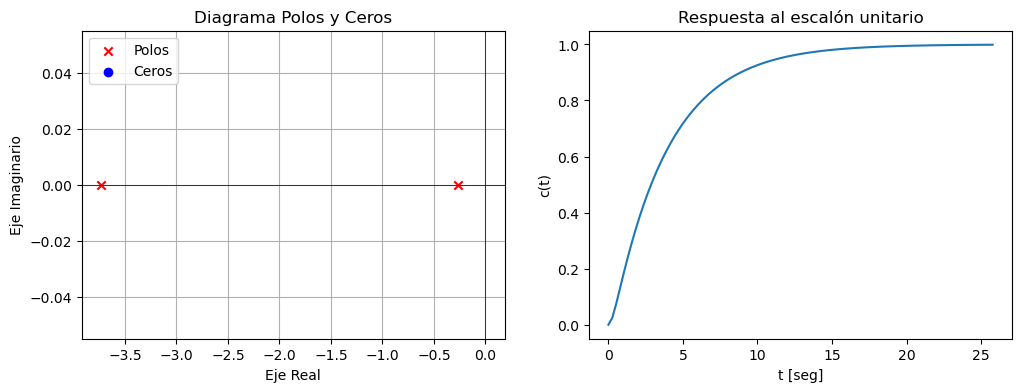

In [53]:
G = ml.tf([1],[1, 4, 1])

plt.figure(figsize=(12, 4))

plt.subplot(121)
pz_plot(G)
plt.subplot(122)
respuesta_escalon(G, 1, False, False, True)

### 2.A. <span id="respuesta-al-escalon-unitario">Respuesta al escalón unitario</span>

## 3. <span id="sist-amortiguacion-critica">Sistemas con amortiguación crítica</span>

Se cumple para estos sistemas que $\xi = 1 \Rightarrow$ se tienen raíces _reales iguales_.

## 4. <span id="sist-subamortiguado">Sistemas subamortiguados</span>

Se cumple para estos sistemas que $0 < \xi < 1 \Rightarrow$ se tienen raíces _complejas conjugadas_.

## 5. Ejercicios
### Ejercicio 1